## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re

import matplotlib.pyplot as plt
import seaborn as sns

## Carregando a base de dados

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


## Explorando a base de dados

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
dataset.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [6]:
dataset.isnull().values.any()

False

<Axes: xlabel='Sentiment'>

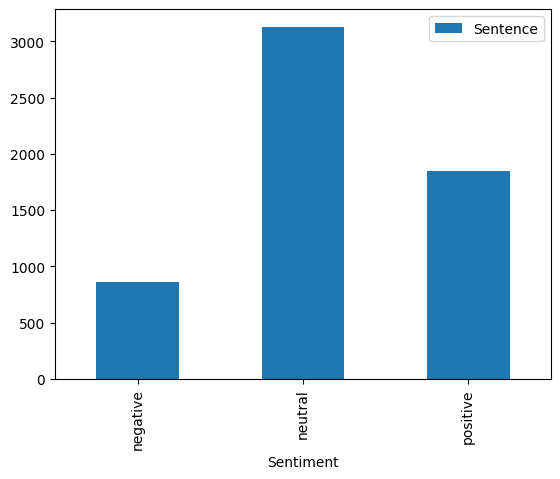

In [7]:
dataset.groupby('Sentiment').count().plot(kind='bar')

## Tratando a base de dados

In [8]:
# removendo duplicatas
# dataset = dataset.drop_duplicates()
# dataset.head()

In [9]:
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def normalizer(texto):  
    texto = re.sub(r'-', ' ', texto) # para que palavras com "Finnish-Russian" se tornem "finnish russian"
    texto =  re.sub(r'[^\w\s]', '', texto) # removendo pontuação
    texto = re.sub(r'[\d]', '', texto) # removendo números

    texto = word_tokenize(texto)# tokenizando
    texto = [word.lower() for word in texto]# colocando tudo em minúsculo
    texto = [word for word in texto if word not in (stop)]    # removendo stopwords
    texto = [lemmatizer.lemmatize(word, pos="v") for word in texto] # lematizando

    return texto



In [11]:
normalizer("Here is text about an airline I like.")

['text', 'airline', 'like']

In [12]:
dataset["normalizer"] = dataset["Sentence"].apply(normalizer)
dataset.head()

,Sentence,Sentiment,normalizer
0,The GeoSolutions technology will leverage Bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[last, quarter, componenta, net, sales, double..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerce, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sell, remain, percent,..."


<Axes: >

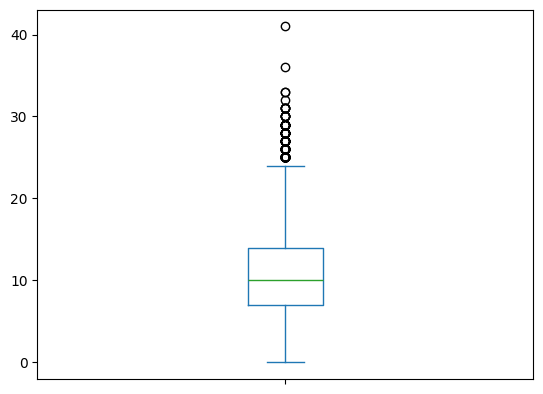

In [13]:
# Calculate tweet lengths
dataset_len = pd.Series([len(tweet) for tweet in dataset['normalizer']])

# The distribution of tweet text lengths
dataset_len.plot(kind='box')

### Traçando a distribuição de tamanho do texto para as frases de sentimento positivo

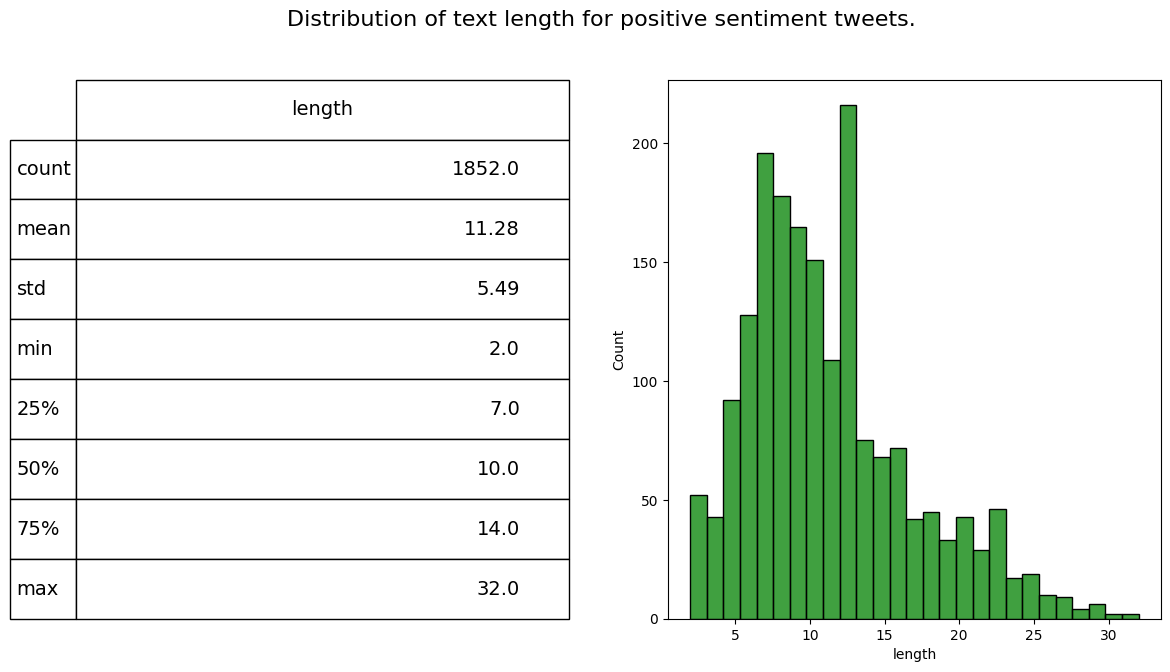

In [14]:
fig = plt.figure(figsize=(14,7))
dataset['length'] = dataset.normalizer.apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(dataset[dataset['Sentiment']=='positive']['length'], ax=ax1,color='green')
describe = dataset['length'][dataset['Sentiment']=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

### Traçando a distribuição de tamanho do texto para as frases de sentimento negativa

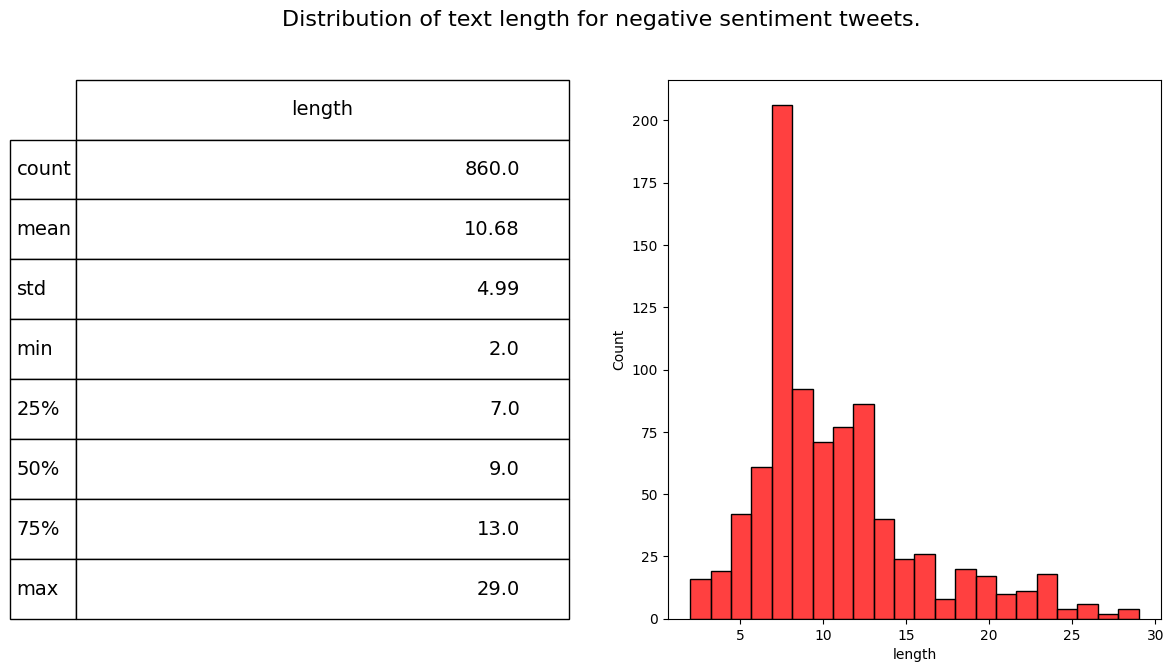

In [18]:
fig = plt.figure(figsize=(14,7))
dataset['length'] = dataset.normalizer.apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(dataset[dataset['Sentiment']=='negative']['length'], ax=ax1,color='red')
describe = dataset['length'][dataset['Sentiment']=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

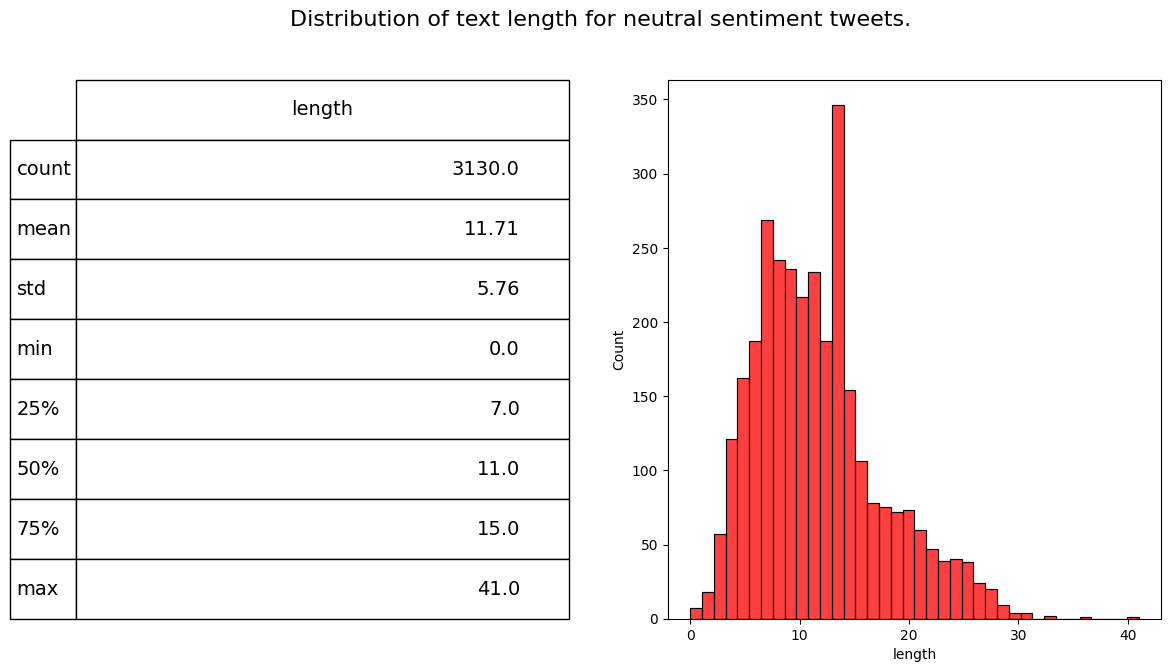

In [19]:
fig = plt.figure(figsize=(14,7))
dataset['length'] = dataset.normalizer.apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(dataset[dataset['Sentiment']=='neutral']['length'], ax=ax1,color='red')
describe = dataset['length'][dataset['Sentiment']=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment tweets.', fontsize=16)

plt.show()

In [16]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    combined_tweets = " ".join([" ".join(tweets) for tweets in df[df.Sentiment==category]['normalizer']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,20))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(dataset, 'positive')
     
# Negative tweet words
wordcount_gen(dataset, 'negative')
     
# Neutral tweet words
wordcount_gen(dataset, 'neutral')

ModuleNotFoundError: No module named 'wordcloud'

# Treinamento do SVM

In [ ]:
def sentimenttarget(sentiment):
    return {
        'negative': -1,
        'neutral': 0,
        'positive' : 1
    }[sentiment]
dataset['Sentiment'] = dataset['Sentiment'].apply(lambda x:sentimenttarget(x))
dataset['Sentiment']

0       1
1      -1
2       1
3       0
4       0
       ..
5837   -1
5838    0
5839    0
5840    0
5841    1
Name: Sentiment, Length: 5842, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split

dataset['normalizer'] = dataset['normalizer'].apply(lambda x: ' '.join(x))
print(dataset['normalizer'])
x_train, x_test, y_train, y_test = train_test_split(dataset['normalizer'], dataset['Sentiment'], test_size=0.4, random_state=50)

0       geosolutions technology leverage benefon gps s...
1                             esi low bk real possibility
2       last quarter componenta net sales double eurm ...
3       accord finnish russian chamber commerce major ...
4       swedish buyout firm sell remain percent stake ...
                              ...                        
5837    rise cost force package producer huhtamaki axe...
5838    nordic walk first use summer train method cros...
5839    accord ship company viking line eu decision si...
5840    build home improvement trade sales decrease eu...
5841    helsinki afx kci konecranes say order four hot...
Name: normalizer, Length: 5842, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

# Criação do vetorizador com n-gramas (ngram_range=(1,2)) e ajuste aos dados de treinamento
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
x_train_vectorized = count_vectorizer.fit_transform(x_train)  

# Treina o modelo SVM
clf = OneVsRestClassifier(svm.SVC(gamma='scale', 
                                  C=0.01, 
                                  probability=True, 
                                  class_weight='balanced', 
                                  kernel='poly', 
                                  degree= 2,
                                  coef0=54.9,  
                                  cache_size=1000,
                                  random_state=50
))

clf_output = clf.fit(x_train_vectorized, y_train)

# Transforma o conjunto de teste usando o mesmo vetorizador ajustado
x_test_vectorized = count_vectorizer.transform(x_test)

# Calcula a precisão do modelo no conjunto de teste
accuracy = clf.score(x_test_vectorized, y_test)
print(f'Acurácia no conjunto de teste: {accuracy}')


Acurácia no conjunto de teste: 0.6936243046640993


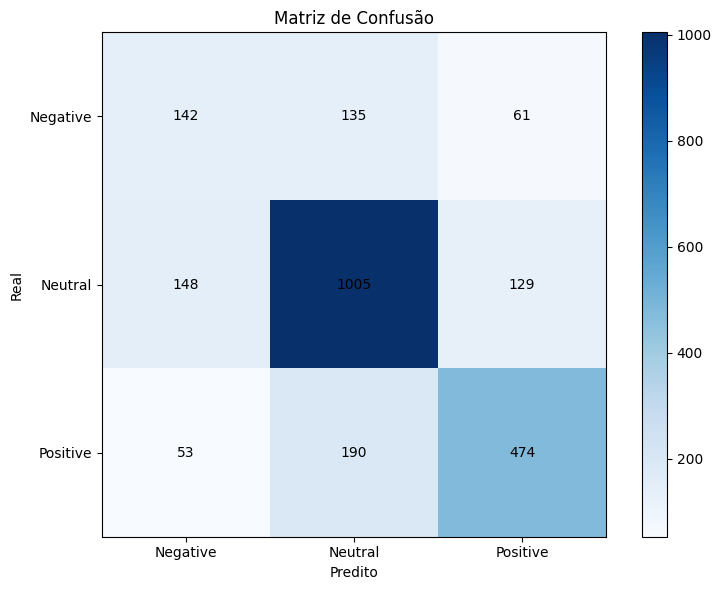

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test_vectorized)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Define os rótulos das classes
classes = ['Negative', 'Neutral', 'Positive']

# Cria a figura
plt.figure(figsize=(8, 6))

# Cria o gráfico de barras
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusão')
plt.colorbar()

# Adiciona os valores na matriz
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predito')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

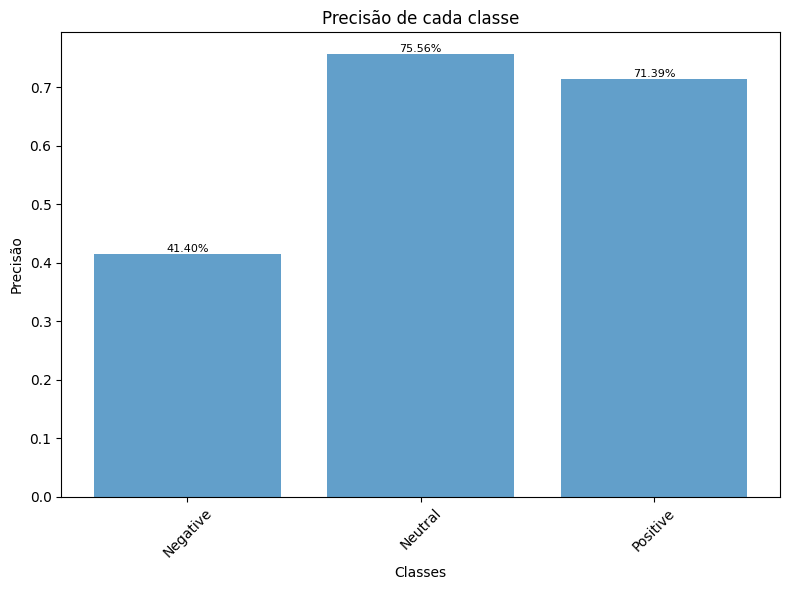

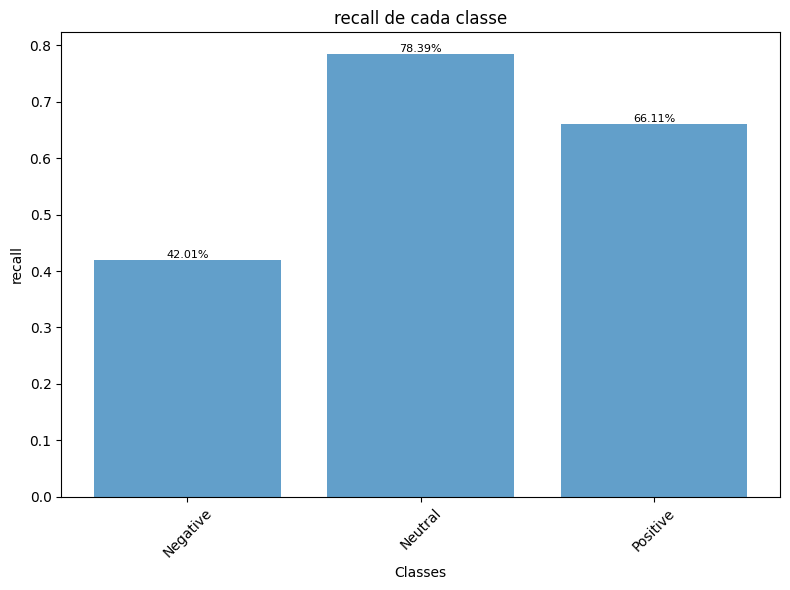

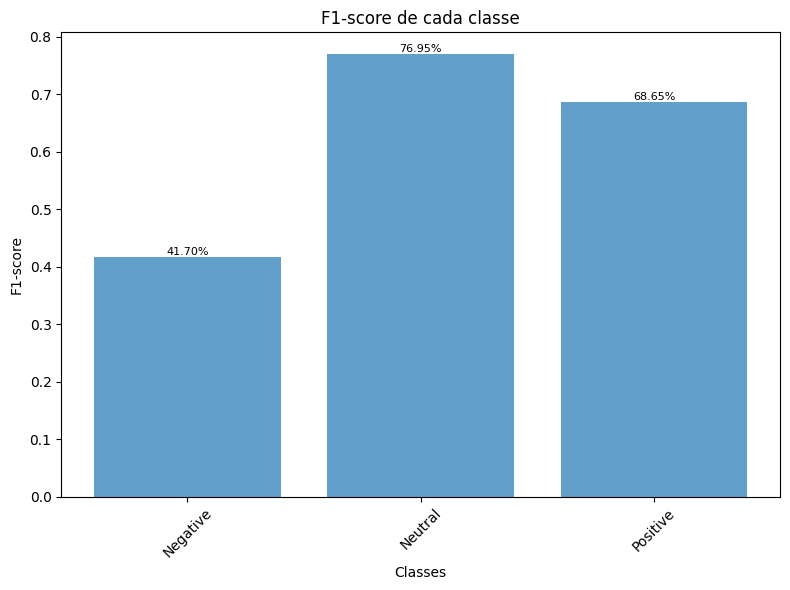

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

'''
A precisão mede a proporção de verdadeiros positivos entre todas as previsões positivas,
o recall mede a proporção de verdadeiros positivos entre todas as amostras que realmente são positivas, 
e o F1-score é a média harmônica entre precisão e recall
'''

# Calcula precisão, recall e F1-score para cada classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Plota as grafico
def pltGrafico(label1, valores):
    plt.figure(figsize=(8, 6))
    bars =  plt.bar(classes, valores, alpha=0.7, label=label1)

    for bar, value in zip(bars, valores):
        plt.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height(), 
                f"{(value*100):.2f}%", 
                ha='center', 
                va='bottom', 
                color='black',
                fontsize=8)


    plt.xlabel('Classes')
    plt.ylabel(label1)
    plt.title(f'{label1} de cada classe')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

pltGrafico('Precisão',precision)
pltGrafico('recall',recall)
pltGrafico('F1-score',f1)
